In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import re

# Regret and Time plots for varying number of states

In [67]:
regret = {"G": {2: np.zeros((3, 10)), 4: np.zeros((3, 10)), 6: np.zeros((3, 10)), 8: np.zeros((3, 10)), 10: np.zeros((3, 10))},
          "H": {2: np.zeros((3, 10)), 4: np.zeros((3, 10)), 6: np.zeros((3, 10)), 8: np.zeros((3, 10)), 10: np.zeros((3, 10))}}
time_taken = {"G": np.zeros((3, 5)), "H": np.zeros((3, 5))}

In [68]:
reg = re.compile(r"(\d+)_state(\d+)_(\w).pkl")


In [70]:
dir_name = "results/states"
for filename in os.listdir(dir_name):
    if filename.endswith(".pkl"):
        if "env" not in filename:
            groups = re.match(reg, filename).groups()
            with open(os.path.join(dir_name, filename), "rb") as f:
                G = pickle.load(f)
                regret[groups[2]][int(groups[1])][int(groups[0]) - 42] = G["episode_regret"]
                time_taken[groups[2]][int(groups[0]) - 42][(int(groups[1]) // 2) - 1] = G["time_taken"]

In [55]:
list_of_nS = [2, 4, 6, 8, 10]

Text(0.5, 0.98, 'Regret over 10 episodes for different number of states')

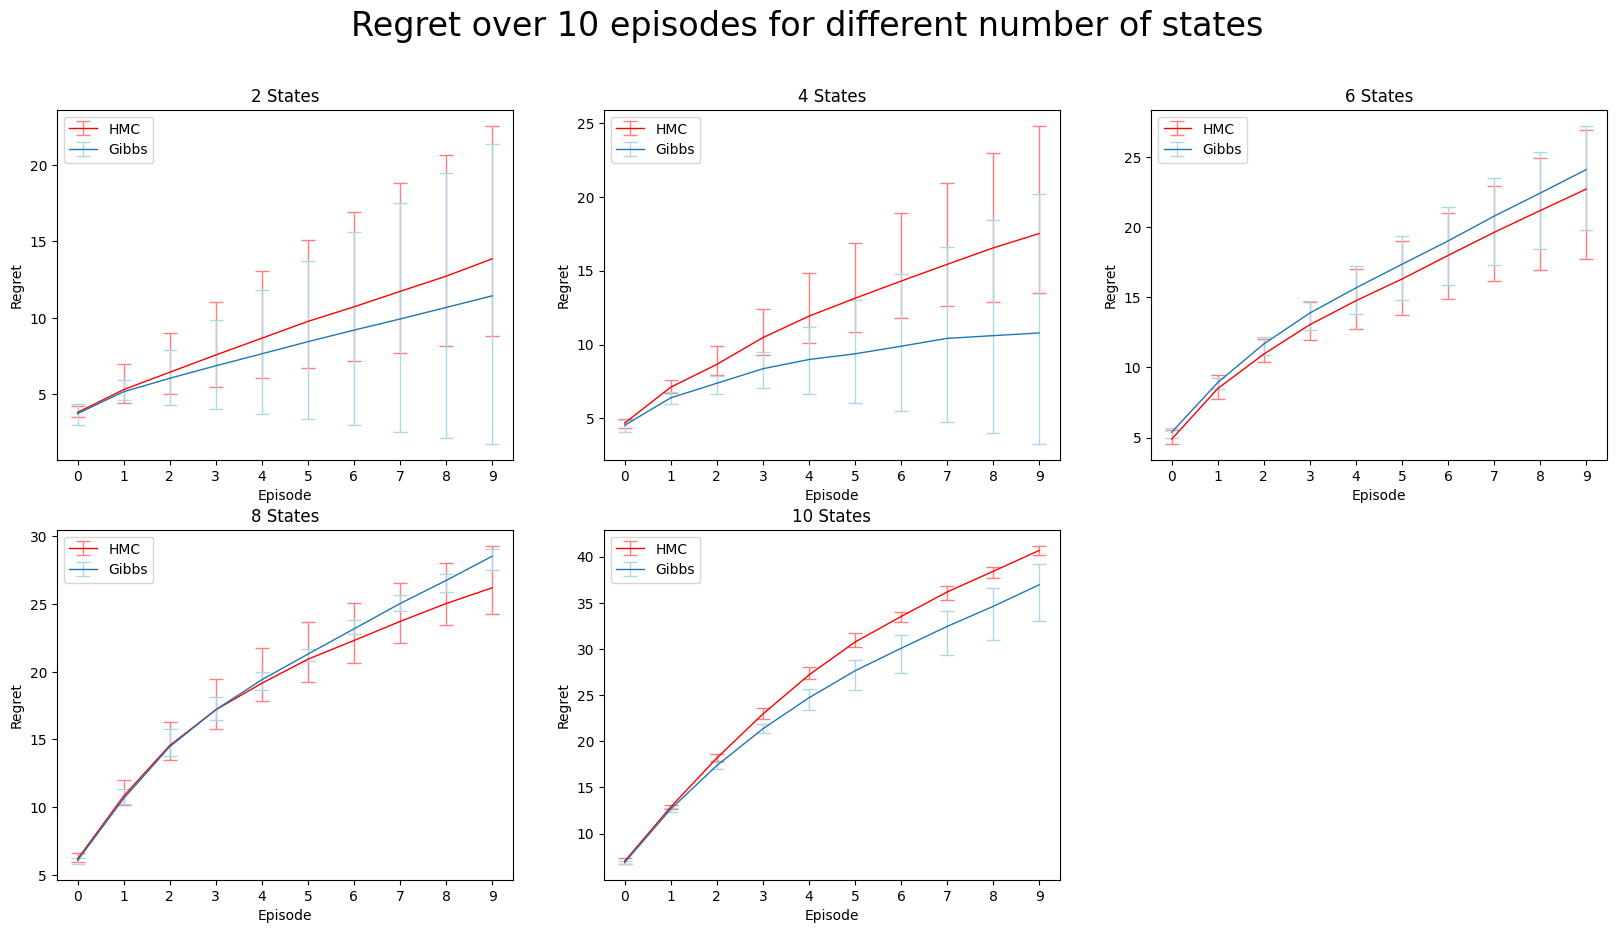

In [129]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, nS in enumerate(list_of_nS):
    index_i = i // 3
    index_j = i % 3
    error_l_h = np.mean(np.cumsum(regret["H"][nS], axis = 1), axis=0) - np.min(np.cumsum(regret["H"][nS], axis = 1), axis=0)
    error_u_h  = np.max(np.cumsum(regret["H"][nS], axis = 1), axis=0) - np.mean(np.cumsum(regret["H"][nS], axis = 1), axis=0)
    error_l_g = np.mean(np.cumsum(regret["G"][nS], axis = 1), axis=0) - np.min(np.cumsum(regret["G"][nS], axis = 1), axis=0)
    error_u_g  = np.max(np.cumsum(regret["G"][nS], axis = 1), axis=0) - np.mean(np.cumsum(regret["G"][nS], axis = 1), axis=0)
    # ax[index_i, index_j].plot(np.mean(regret["H"][nS], axis=0), label=f"HMC", color = "red")
    ax[index_i, index_j].errorbar(x = np.arange(0, 10), y = np.mean(np.cumsum(regret["H"][nS], axis = 1), axis = 0), 
                                  yerr= [error_l_h, error_u_h], label=f"HMC", color = "red", ecolor='#ff7f7f', lw=1, capsize=5, capthick=1)
    # ax[index_i, index_j].plot(np.mean(regret["G"][nS], axis=0), label=f"Gibbs")
    ax[index_i, index_j].errorbar(x = np.arange(0, 10), y = np.mean(np.cumsum(regret["G"][nS], axis = 1), axis=0), 
                                  yerr= [error_l_g, error_u_g], label=f"Gibbs", ecolor='#add8e6', lw=1, capsize=5, capthick=1)
    ax[index_i, index_j].set_xticks(np.arange(0, 10))
    ax[index_i, index_j].set_xlabel("Episode")
    ax[index_i, index_j].set_ylabel("Regret")
    ax[index_i, index_j].set_title(f"{nS} States")
    ax[index_i, index_j].legend()
ax[1, 2].set_visible(False)
fig.suptitle("Regret over 10 episodes for different number of states", fontsize = 24)

Text(0.5, 1.0, 'Time taken for different number of states')

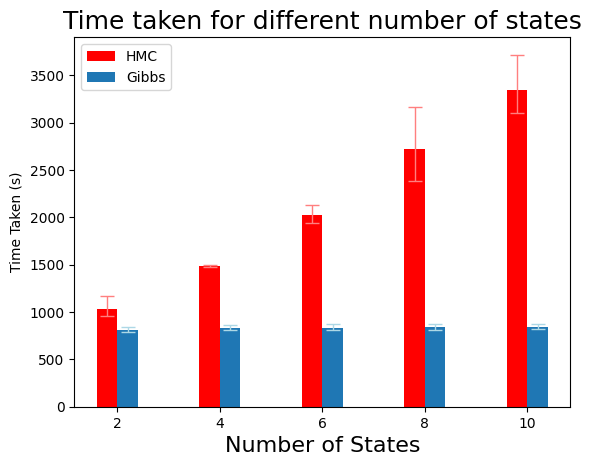

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
error_l_h = np.mean(time_taken["H"], axis=0) - np.min(time_taken["H"], axis=0)
error_u_h  = np.max(time_taken["H"], axis=0) - np.mean(time_taken["H"], axis=0)
error_l_g = np.mean(time_taken["G"], axis=0) - np.min(time_taken["G"], axis=0)
error_u_g  = np.max(time_taken["G"], axis=0) - np.mean(time_taken["G"], axis=0)
ax.bar(np.arange(2, 12, 2) - 0.2, np.mean(time_taken["H"], axis=0), 0.4, yerr = [error_l_h, error_u_h], label="HMC", color = "red", error_kw=dict(ecolor='#ff7f7f', lw=1, capsize=5, capthick=1))
ax.bar(np.arange(2, 12, 2) + 0.2, np.mean(time_taken["G"], axis=0), 0.4, yerr = [error_l_g, error_u_g], label="Gibbs", error_kw=dict(ecolor='#add8e6', lw=1, capsize=5, capthick=1))
ax.set_xticks(np.arange(2, 12, 2))
ax.set_xlabel("Number of States", fontsize = 16)
ax.set_ylabel("Time Taken (s)")
ax.legend()
ax.set_title("Time taken for different number of states", fontsize = 18)

# Regret and Time plots for varying components

In [4]:
regret_comp = {"G": {2: np.zeros((3, 10)), 3: np.zeros((3, 10)), 4: np.zeros((3, 10)), 5: np.zeros((3, 10)), 6:np.zeros((3, 10)), 7:np.zeros((3, 10)), 8:np.zeros((3, 10)), 9:np.zeros((3, 10))},
          "H": {2: np.zeros((3, 10)), 3: np.zeros((3, 10)), 4: np.zeros((3, 10)), 5: np.zeros((3, 10)),  6:np.zeros((3, 10)), 7:np.zeros((3, 10)), 8:np.zeros((3, 10)), 9:np.zeros((3, 10))}}
time_taken_comp = {"G": np.zeros((3, 8)), "H": np.zeros((3, 8))}
reg_comp = re.compile(r"(\d+)_ncomp(\d+)_(\w).pkl")

In [5]:
filename = "42_ncomp2_H.pkl"
re.match(reg_comp, filename).groups()

('42', '2', 'H')

In [6]:
dir_name = "results/ncomps"
for filename in os.listdir(dir_name):
    if filename.endswith(".pkl"):
        if "env" not in filename:
            match = re.match(reg_comp, filename)
            if match is None:
                continue
            groups = match.groups()
            with open(os.path.join(dir_name, filename), "rb") as f:
                G = pickle.load(f)
                regret_comp[groups[2]][int(groups[1])][int(groups[0]) - 42] = G["episode_regret"]
                time_taken_comp[groups[2]][int(groups[0]) - 42][int(groups[1]) -2] = G["time_taken"]

In [8]:
list_of_k = [2, 3, 4, 5, 6, 7, 8, 9]

Text(0.5, 0.98, 'Regret over 10 episodes for different number of components')

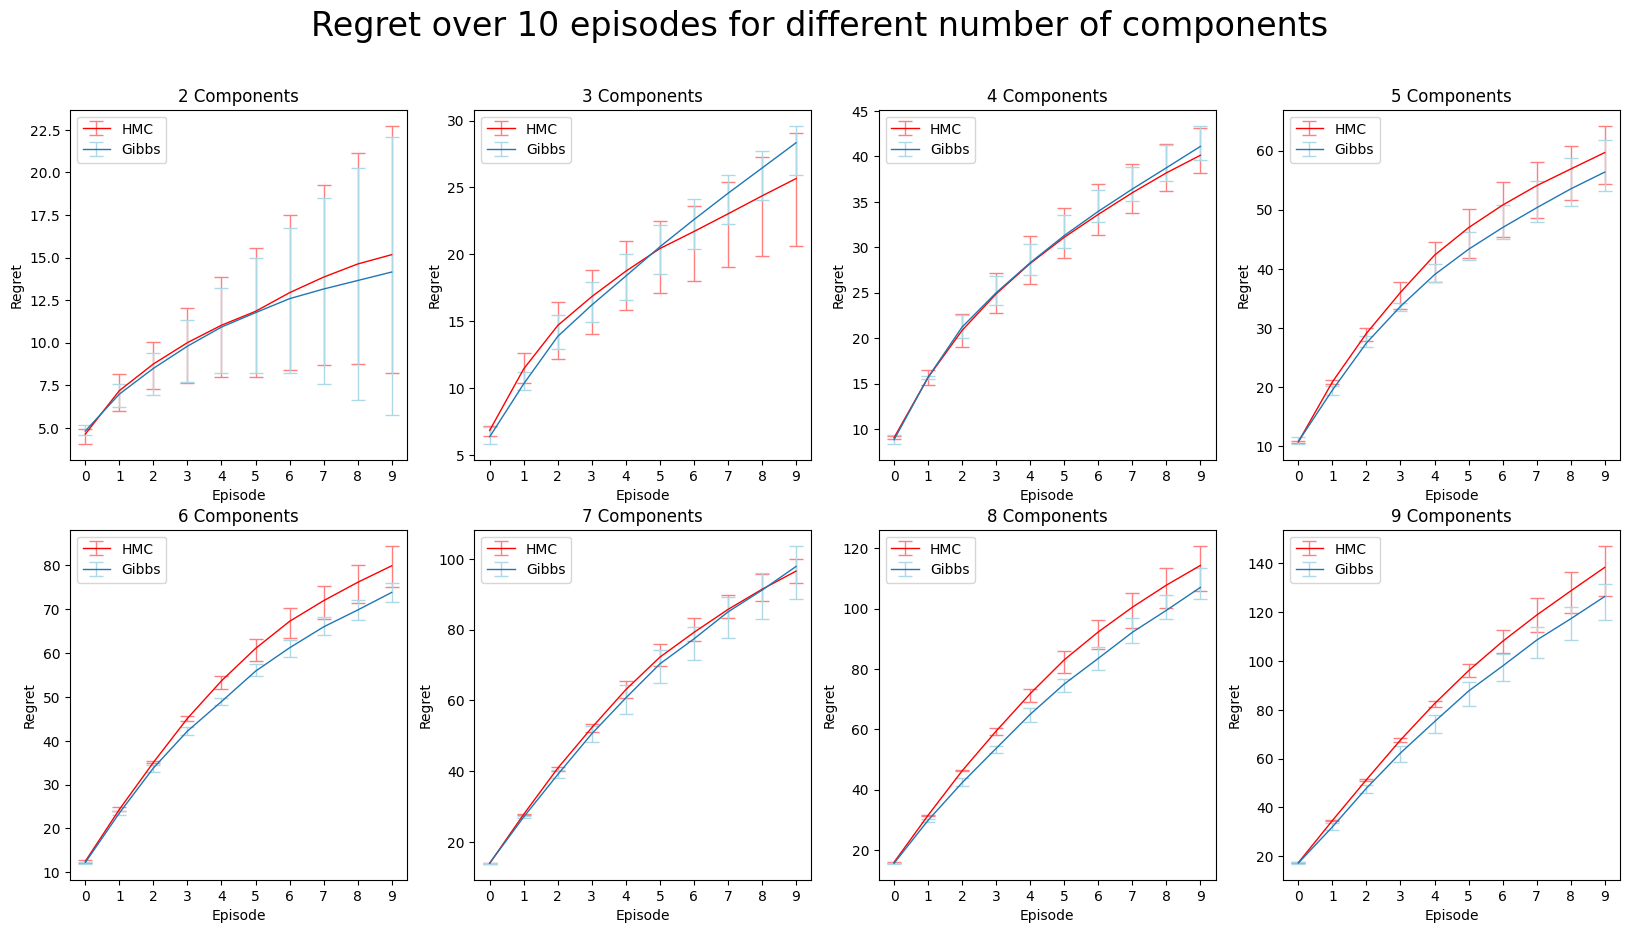

In [10]:
fig_2, ax_2 = plt.subplots(2, 4, figsize=(20, 10))
for i, k in enumerate(list_of_k):
    index_i = i // 4
    index_j = i % 4
    error_l_h = np.mean(np.cumsum(regret_comp["H"][k], axis = 1), axis=0) - np.min(np.cumsum(regret_comp["H"][k], axis = 1), axis=0)
    error_u_h  = np.max(np.cumsum(regret_comp["H"][k], axis = 1), axis=0) - np.mean(np.cumsum(regret_comp["H"][k], axis = 1), axis=0)
    error_l_g = np.mean(np.cumsum(regret_comp["G"][k], axis = 1), axis=0) - np.min(np.cumsum(regret_comp["G"][k], axis = 1), axis=0)
    error_u_g  = np.max(np.cumsum(regret_comp["G"][k], axis = 1), axis=0) - np.mean(np.cumsum(regret_comp["G"][k], axis = 1), axis=0)
    # ax[index_i, index_j].plot(np.mean(regret["H"][nS], axis=0), label=f"HMC", color = "red")
    ax_2[index_i, index_j].errorbar(x = np.arange(0, 10), y = np.mean(np.cumsum(regret_comp["H"][k], axis = 1), axis = 0), 
                                  yerr= [error_l_h, error_u_h], label=f"HMC", color = "red", ecolor='#ff7f7f', lw=1, capsize=5, capthick=1)
    # ax[index_i, index_j].plot(np.mean(regret["G"][nS], axis=0), label=f"Gibbs")
    ax_2[index_i, index_j].errorbar(x = np.arange(0, 10), y = np.mean(np.cumsum(regret_comp["G"][k], axis = 1), axis=0), 
                                  yerr= [error_l_g, error_u_g], label=f"Gibbs", ecolor='#add8e6', lw=1, capsize=5, capthick=1)
    ax_2[index_i, index_j].set_xticks(np.arange(0, 10))
    ax_2[index_i, index_j].set_xlabel("Episode")
    ax_2[index_i, index_j].set_ylabel("Regret")
    ax_2[index_i, index_j].set_title(f"{k} Components")
    ax_2[index_i, index_j].legend()
fig_2.suptitle("Regret over 10 episodes for different number of components", fontsize = 24)

Text(0.5, 1.0, 'Time taken for different number of components')

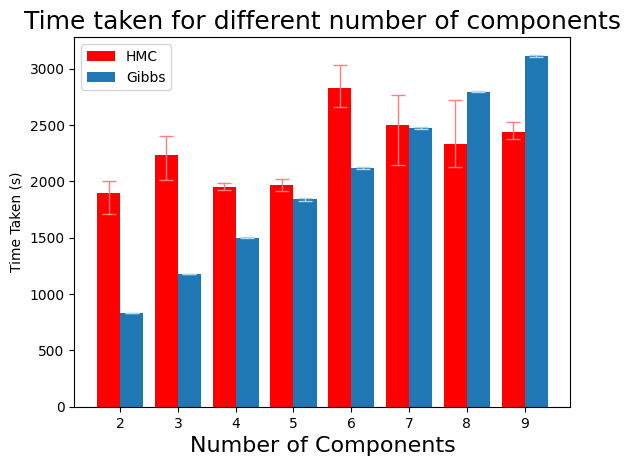

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
error_l_h = np.mean(time_taken_comp["H"], axis=0) - np.min(time_taken_comp["H"], axis=0)
error_u_h  = np.max(time_taken_comp["H"], axis=0) - np.mean(time_taken_comp["H"], axis=0)
error_l_g = np.mean(time_taken_comp["G"], axis=0) - np.min(time_taken_comp["G"], axis=0)
error_u_g  = np.max(time_taken_comp["G"], axis=0) - np.mean(time_taken_comp["G"], axis=0)
ax.bar(np.arange(2, 10) - 0.2, np.mean(time_taken_comp["H"], axis=0), 0.4, yerr = [error_l_h, error_u_h], label="HMC", color = "red", error_kw=dict(ecolor='#ff7f7f', lw=1, capsize=5, capthick=1))
ax.bar(np.arange(2, 10) + 0.2, np.mean(time_taken_comp["G"], axis=0), 0.4, yerr = [error_l_g, error_u_g], label="Gibbs", error_kw=dict(ecolor='#add8e6', lw=1, capsize=5, capthick=1))
ax.set_xticks(np.arange(2, 10))
ax.set_xlabel("Number of Components", fontsize = 16)
ax.set_ylabel("Time Taken (s)")
ax.legend()
ax.set_title("Time taken for different number of components", fontsize = 18)

# Regret and Time plots for varying time horizons

In [17]:
regret_horizon = {"G": {(10, 100): np.zeros((3, 100)), (25, 40): np.zeros((3, 40)), (50, 20): np.zeros((3, 20)), (100, 10): np.zeros((3, 10)), (200, 5): np.zeros((3, 5))},
          "H": {(10, 100): np.zeros((3, 100)), (25, 40): np.zeros((3, 40)), (50, 20): np.zeros((3, 20)), (100, 10): np.zeros((3, 10)), (200, 5): np.zeros((3, 5))}}
time_taken_horizon = {"G": np.zeros((3, 5)), "H": np.zeros((3, 5))}
reg_horizon = re.compile(r"(\d+)_horizon(\d+)_(\w).pkl")
horizon_dict = {10: 100, 25: 40, 50: 20, 100: 10, 200: 5}
horizon_list= list(horizon_dict.keys())


In [22]:
dir_name = "results/horizons"
for filename in os.listdir(dir_name):
    if filename.endswith(".pkl"):
        if "env" not in filename:
            groups = re.match(reg_horizon, filename).groups()
            with open(os.path.join(dir_name, filename), "rb") as f:
                print(filename)
                G = pickle.load(f)
                print((int(groups[1]), horizon_dict[int(groups[1])]))
                print(regret_horizon[groups[2]][(int(groups[1]), horizon_dict[int(groups[1])])][int(groups[0]) - 42].shape)
                print(G["episode_regret"])
                regret_horizon[groups[2]][(int(groups[1]), horizon_dict[int(groups[1])])][int(groups[0]) - 42] = G["episode_regret"]
                time_taken_horizon[groups[2]][int(groups[0]) - 42][horizon_list.index(int(groups[1]))] = G["time_taken"]

44_horizon200_H.pkl
(200, 5)
(5,)
[4.376142164632056, 1.6863496983731603, 1.1140803363293692, 0.3149900398337796, 0.476497047085535, 0.2930617820262612, 0.16323693260906014, 0.334236053556793, 0.30157586351177557, 0.377822114376545]


ValueError: could not broadcast input array from shape (10,) into shape (5,)